<a href="https://colab.research.google.com/github/Karla-Flores/Neural-Network--Charity-Donation/blob/main/Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [48]:
from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data (1).csv


In [49]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
# application_df = pd.read_csv("../Resources/charity_data.csv")
application_df = pd.read_csv('charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [50]:
application_df.shape

(34299, 12)

In [51]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'],axis=1)
application_df.shape

(34299, 10)

In [52]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [53]:
# Look at APPLICATION_TYPE value counts for binning
application_value = application_df.loc[:, 'APPLICATION_TYPE'].value_counts()
application_value

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [54]:
# Look at CLASSIFICATION value counts for binning
classification_value = application_df.loc[:, 'CLASSIFICATION'].value_counts()
classification_value

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1732        1
C4120        1
C1370        1
C2561        1
C2500        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [55]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_value[application_value<200].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

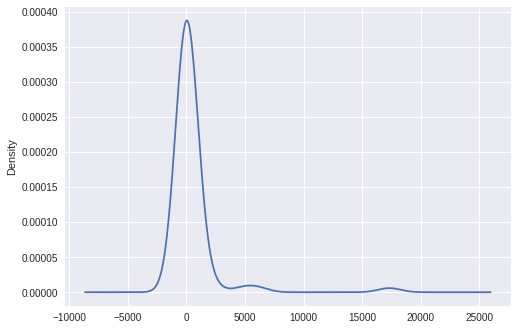

In [56]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_value.plot(kind='density')

In [57]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_value[classification_value<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [58]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [59]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, dtype=float)
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
application_df.dtypes

STATUS                            int64
ASK_AMT                           int64
IS_SUCCESSFUL                     int64
APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T10            float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
APPLICATION_TYPE_T7             float64
APPLICATION_TYPE_T8             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_C2100            float64
CLASSIFICATION_C3000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64


In [61]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop('IS_SUCCESSFUL', axis=1).values

# Split the preprocessed data into a training and
# testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [62]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [63]:
X_train.shape

(25724, 43)

## Compile, Train and Evaluate the Model

# Model Evaluation 1

In [64]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=80
hidden_nodes_layer2=30

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 80)                3520      
_________________________________________________________________
dense_11 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [66]:
fit_model = nn_model.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5731 - accuracy: 0.7178 - recall_3: 0.7755 - val_loss: 0.5570 - val_accuracy: 0.7339 - val_recall_3: 0.7481
Epoch 2/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5583 - accuracy: 0.7275 - recall_3: 0.7804 - val_loss: 0.5475 - val_accuracy: 0.7339 - val_recall_3: 0.7606
Epoch 3/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7279 - recall_3: 0.7784 - val_loss: 0.5456 - val_accuracy: 0.7334 - val_recall_3: 0.7670
Epoch 4/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5524 - accuracy: 0.7292 - recall_3: 0.7884 - val_loss: 0.5490 - val_accuracy: 0.7341 - val_recall_3: 0.7606
Epoch 5/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.7305 - recall_3: 0.7885 - val_loss: 0.5470 - val_accuracy: 0.7336 - val_recall_3: 0.7885
Epoch 6/100
684/684 [==============================] - 2s 2ms/step - loss: 

In [67]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_Recall= nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5653 - accuracy: 0.7291 - recall_3: 0.7826
Loss: 0.5652697682380676, Accuracy: 0.7290962338447571


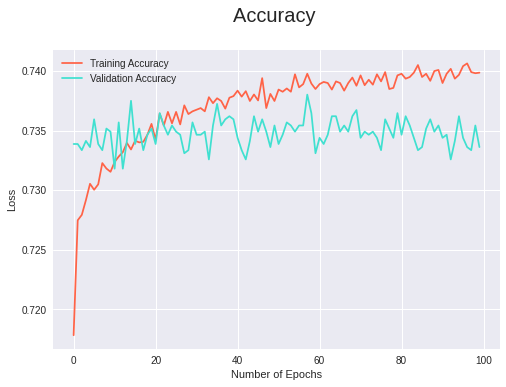

In [75]:
# Model Accuracy Graph
plt.style.use('seaborn')
plt.title('Accuracy \n',fontsize=20)
plt.plot(fit_model.history['accuracy'], 'tomato', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'turquoise',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

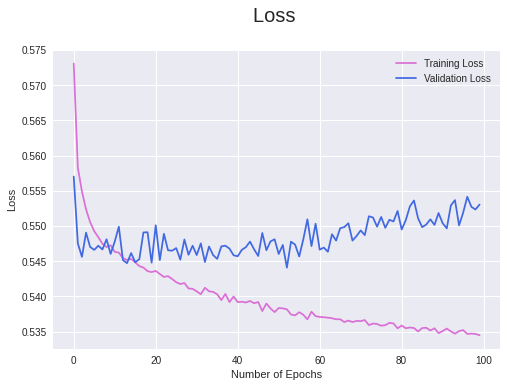

In [76]:
# Model Loss Graph
plt.style.use('seaborn')
plt.title('Loss \n',fontsize=20)
plt.plot(fit_model.history['loss'], 'orchid', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'royalblue', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
# Export our model to HDF5 file
from google.colab import files

nn_model.save('/content/Alphabet_Soup_model1.h5')
files.download('/content/Alphabet_Soup_model1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Evaluation 2

In [77]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=1450
hidden_nodes_layer2=80

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1450)              63800     
_________________________________________________________________
dense_14 (Dense)             (None, 80)                116080    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 81        
Total params: 179,961
Trainable params: 179,961
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [79]:
fit_model = nn_model.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 4s 5ms/step - loss: 0.5695 - accuracy: 0.7194 - recall_4: 0.7871 - val_loss: 0.5520 - val_accuracy: 0.7344 - val_recall_4: 0.7566
Epoch 2/100
684/684 [==============================] - 3s 5ms/step - loss: 0.5581 - accuracy: 0.7273 - recall_4: 0.7824 - val_loss: 0.5494 - val_accuracy: 0.7357 - val_recall_4: 0.7566
Epoch 3/100
684/684 [==============================] - 3s 5ms/step - loss: 0.5548 - accuracy: 0.7285 - recall_4: 0.7780 - val_loss: 0.5519 - val_accuracy: 0.7372 - val_recall_4: 0.7581
Epoch 4/100
684/684 [==============================] - 3s 4ms/step - loss: 0.5530 - accuracy: 0.7310 - recall_4: 0.7883 - val_loss: 0.5521 - val_accuracy: 0.7359 - val_recall_4: 0.7805
Epoch 5/100
684/684 [==============================] - 3s 5ms/step - loss: 0.5518 - accuracy: 0.7309 - recall_4: 0.7932 - val_loss: 0.5495 - val_accuracy: 0.7344 - val_recall_4: 0.7785
Epoch 6/100
684/684 [==============================] - 3s 5ms/step - loss: 

In [80]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_Recall= nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5760 - accuracy: 0.7318 - recall_4: 0.8021
Loss: 0.575981616973877, Accuracy: 0.7317784428596497


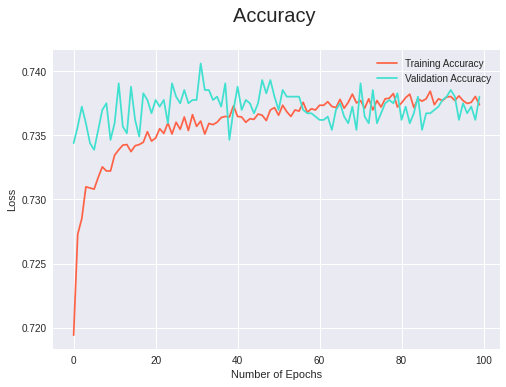

In [83]:
# Model Accuracy Graph
plt.style.use('seaborn')
plt.title('Accuracy \n',fontsize=20)
plt.plot(fit_model.history['accuracy'], 'tomato', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'turquoise',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

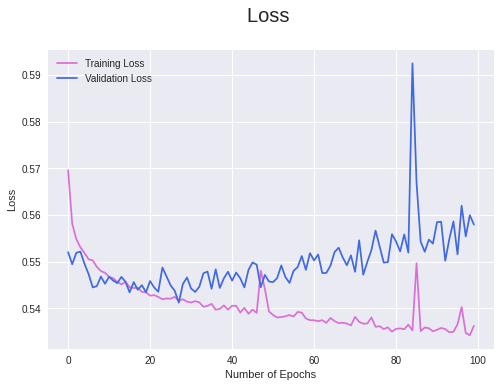

In [84]:
# Model Loss Graph
plt.style.use('seaborn')
plt.title('Loss \n',fontsize=20)
plt.plot(fit_model.history['loss'], 'orchid', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'royalblue', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Export our model to HDF5 file
from google.colab import files

nn_model.save('/content/Alphabet_Soup_model2.h5')
files.download('/content/Alphabet_Soup_model2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Evaluation 3

In [85]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=3
hidden_nodes_layer2=15
hidden_nodes_layer3=3

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 3)                 132       
_________________________________________________________________
dense_17 (Dense)             (None, 15)                60        
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 48        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 4         
Total params: 244
Trainable params: 244
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [87]:
fit_model = nn_model.fit( X_train_scaled,y_train,validation_split=0.15,epochs=100)

Epoch 1/100
684/684 [==============================] - 2s 2ms/step - loss: 0.6441 - accuracy: 0.6804 - recall_5: 0.7185 - val_loss: 0.5935 - val_accuracy: 0.7269 - val_recall_5: 0.7710
Epoch 2/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5882 - accuracy: 0.7188 - recall_5: 0.7939 - val_loss: 0.5734 - val_accuracy: 0.7315 - val_recall_5: 0.7899
Epoch 3/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5774 - accuracy: 0.7215 - recall_5: 0.8056 - val_loss: 0.5683 - val_accuracy: 0.7318 - val_recall_5: 0.7899
Epoch 4/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5737 - accuracy: 0.7225 - recall_5: 0.8075 - val_loss: 0.5664 - val_accuracy: 0.7318 - val_recall_5: 0.7894
Epoch 5/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5709 - accuracy: 0.7235 - recall_5: 0.8006 - val_loss: 0.5643 - val_accuracy: 0.7300 - val_recall_5: 0.7959
Epoch 6/100
684/684 [==============================] - 1s 2ms/step - loss: 

In [88]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_Recall= nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5613 - accuracy: 0.7255 - recall_5: 0.7732
Loss: 0.5612754821777344, Accuracy: 0.7254810333251953


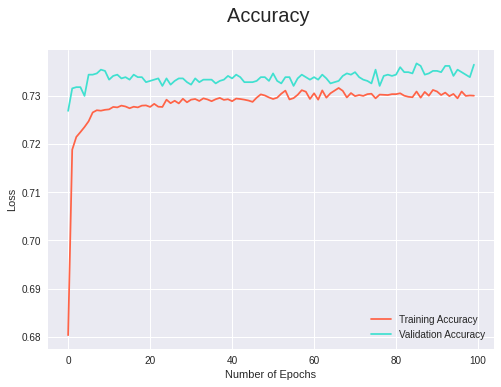

In [92]:
# Model Accuracy Graph
plt.style.use('seaborn')
plt.title('Accuracy \n',fontsize=20)
plt.plot(fit_model.history['accuracy'], 'tomato', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'turquoise',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

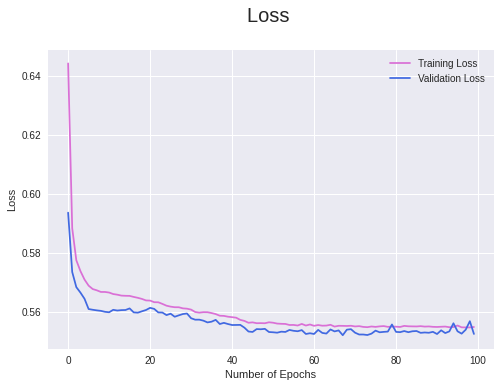

In [93]:
# Model Loss Graph
plt.style.use('seaborn')
plt.title('Loss \n',fontsize=20)
plt.plot(fit_model.history['loss'], 'orchid', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'royalblue', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Export our model to HDF5 file
from google.colab import files

nn_model.save('/content/Alphabet_Soup_model3.h5')
files.download('/content/Alphabet_Soup_model3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>